In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz
import warnings
warnings.filterwarnings("ignore")

In [3]:
iris = datasets.load_iris()
print('Dataset structure= ', dir(iris))

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x]) # Each value from 'target' is used as index to get corresponding value from 'target_names' 

print('Unique target values=',df['target'].unique())

df.sample(5)

Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
18,5.7,3.8,1.7,0.3,0,setosa
149,5.9,3.0,5.1,1.8,2,virginica
141,6.9,3.1,5.1,2.3,2,virginica
46,5.1,3.8,1.6,0.2,0,setosa
40,5.0,3.5,1.3,0.3,0,setosa


In [4]:
# label = 0 (setosa)
df[df.target == 0].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [5]:
# label = 1 (versicolor)
df[df.target == 1].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor


In [6]:
# label = 2 (verginica)
df[df.target == 2].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica


In [7]:
#Lets create feature matrix X  and y labels
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['target']]

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (150, 4)
y shape= (150, 1)


In [8]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (120, 4)
X_test dimension=  (30, 4)
y_train dimension=  (120, 1)
y_train dimension=  (30, 1)


In [9]:
"""
To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
Also note that default value of criteria to split the data is 'gini'
"""
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [10]:
print('Actual value of species for 10th training example=',iris.target_names[y_test.iloc[10]][0])
print('Predicted value of species for 10th training example=', iris.target_names[cls.predict([X_test.iloc[10]])][0])

print('\nActual value of species for 20th training example=',iris.target_names[y_test.iloc[20]][0])
print('Predicted value of species for 20th training example=', iris.target_names[cls.predict([X_test.iloc[20]])][0])

print('\nActual value of species for 30th training example=',iris.target_names[y_test.iloc[29]][0])
print('Predicted value of species for 30th training example=', iris.target_names[cls.predict([X_test.iloc[29]])][0])

Actual value of species for 10th training example= versicolor
Predicted value of species for 10th training example= versicolor

Actual value of species for 20th training example= versicolor
Predicted value of species for 20th training example= versicolor

Actual value of species for 30th training example= virginica
Predicted value of species for 30th training example= virginica


In [11]:
cls.score(X_test, y_test)

0.9666666666666667

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

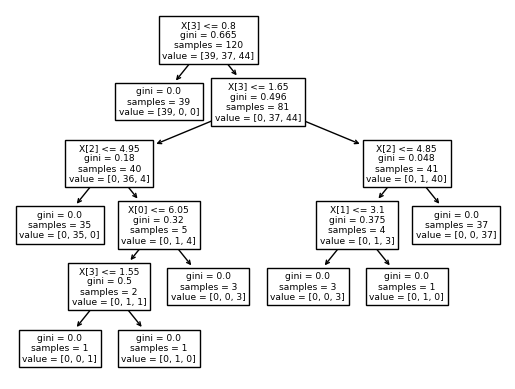

In [12]:
tree.plot_tree(cls)

In [13]:
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris_decision_tree") 

'iris_decision_tree.pdf'

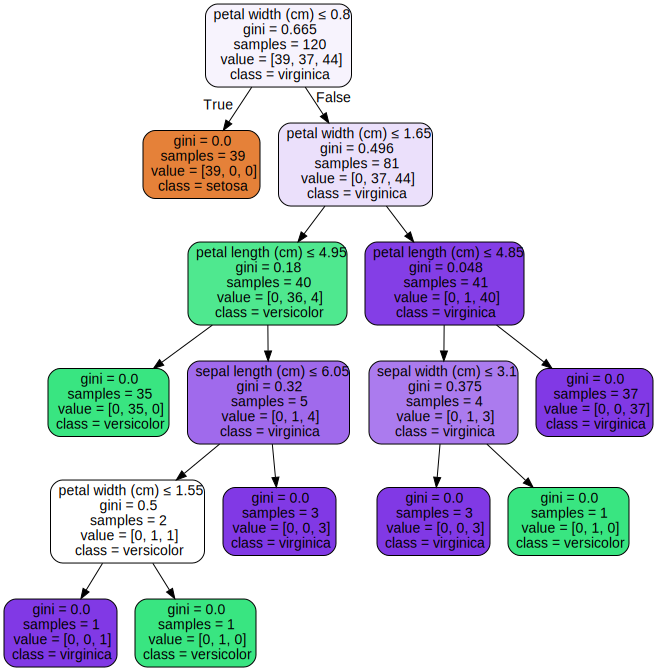

In [14]:
dot_data = tree.export_graphviz(cls, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph